In [3]:
#  1. Import the necessary libraries if you are starting a new notebook. 
#Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# 2. Find all of the categorical data. Save it in a categorical_df variable.

categorical_df = customer_df.select_dtypes(include = object)
categorical_df.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [5]:
# 3. Check for NaN values.
categorical_df.isna().sum()

Customer             0
State                0
Response             0
Coverage             0
Education            0
Effective To Date    0
EmploymentStatus     0
Gender               0
Location Code        0
Marital Status       0
Policy Type          0
Policy               0
Renew Offer Type     0
Sales Channel        0
Vehicle Class        0
Vehicle Size         0
dtype: int64

In [6]:
# 4. Check all unique values of columns.
categorical_df.nunique()

Customer             9134
State                   5
Response                2
Coverage                3
Education               5
Effective To Date      59
EmploymentStatus        5
Gender                  2
Location Code           3
Marital Status          3
Policy Type             3
Policy                  9
Renew Offer Type        4
Sales Channel           4
Vehicle Class           6
Vehicle Size            3
dtype: int64

In [7]:
# 5. Check dtypes. Do they all make sense as categorical data?
categorical_df.dtypes

Customer             object
State                object
Response             object
Coverage             object
Education            object
Effective To Date    object
EmploymentStatus     object
Gender               object
Location Code        object
Marital Status       object
Policy Type          object
Policy               object
Renew Offer Type     object
Sales Channel        object
Vehicle Class        object
Vehicle Size         object
dtype: object

In [8]:
# 6. Does any column contain alpha and numeric data? Decide how to clean it.
categorical_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])

In [9]:
def cleaning_alpha_numeric(x):
    if '1' in x:
        x = x.replace('1', 'A')
        return x
    elif '2' in x:
        x = x.replace('2', 'B')
        return x
    elif '3' in x:
        x = x.replace('3', 'C')
        return x
    else:
        x = x.replace('4', 'D')
        return x
    

categorical_df['Policy'] = categorical_df['Policy'].apply(cleaning_alpha_numeric)
categorical_df['Policy']

0       Corporate LC
1        Personal LC
2        Personal LC
3       Corporate LB
4        Personal LA
            ...     
9129     Personal LA
9130    Corporate LC
9131    Corporate LB
9132     Personal LB
9133    Corporate LC
Name: Policy, Length: 9134, dtype: object

In [10]:
categorical_df['Renew Offer Type'] =categorical_df['Renew Offer Type'].apply(cleaning_alpha_numeric) 
categorical_df['Renew Offer Type']

0       OfferA
1       OfferC
2       OfferA
3       OfferA
4       OfferA
         ...  
9129    OfferB
9130    OfferA
9131    OfferA
9132    OfferC
9133    OfferD
Name: Renew Offer Type, Length: 9134, dtype: object

In [11]:
display(categorical_df['Policy'].value_counts())
display(categorical_df['Renew Offer Type'].value_counts()) 

Personal LC     3426
Personal LB     2122
Personal LA     1240
Corporate LC    1014
Corporate LB     595
Corporate LA     359
Special LB       164
Special LC       148
Special LA        66
Name: Policy, dtype: int64

OfferA    3752
OfferB    2926
OfferC    1432
OfferD    1024
Name: Renew Offer Type, dtype: int64

In [12]:
# 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.
categorical_df.columns = categorical_df.columns.str.lower()
categorical_df.columns = categorical_df.columns.str.replace(' ', '_')

In [13]:
categorical_df['vehicle_size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [14]:
categorical_df.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate LC,OfferA,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal LC,OfferC,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal LC,OfferA,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate LB,OfferA,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal LA,OfferA,Agent,Four-Door Car,Medsize


In [15]:
# 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
categorical_df.groupby(['policy_type', 'policy']).agg({'gender': 'count'})

gender
policy_type    policy              
Corporate Auto Corporate LA     359
               Corporate LB     595
               Corporate LC    1014
Personal Auto  Personal LA     1240
               Personal LB     2122
               Personal LC     3426
Special Auto   Special LA        66
               Special LB       164
               Special LC       148

In [16]:
# 9. Check number of unique values in each column, can they be combined in any way to ease encoding? 
#Comment your thoughts and make those changes.

In [17]:
print("customer unique values", categorical_df['customer'].nunique())
print("state unique values", categorical_df['state'].nunique())
print("response unique values", categorical_df['response'].nunique())
print("coverage unique values", categorical_df['coverage'].nunique())
print("education unique values", categorical_df['education'].nunique())
print("effective_to_date unique values", categorical_df['effective_to_date'].nunique())
print("employmentstatus unique values", categorical_df['employmentstatus'].nunique())
print("gender unique values", categorical_df['gender'].nunique())
print("location_code unique values", categorical_df['location_code'].nunique())
print("marital_status unique values", categorical_df['marital_status'].nunique())
print("policy_type unique values", categorical_df['policy_type'].nunique())
print("policy unique values", categorical_df['policy'].nunique())
print("renew_offer_type unique values", categorical_df['renew_offer_type'].nunique())
print("sales_channel unique values", categorical_df['sales_channel'].nunique())
print("vehicle_class unique values", categorical_df['vehicle_class'].nunique())
print("vehicle_size unique values", categorical_df['vehicle_size'].nunique())


customer unique values 9134
state unique values 5
response unique values 2
coverage unique values 3
education unique values 5
effective_to_date unique values 59
employmentstatus unique values 5
gender unique values 2
location_code unique values 3
marital_status unique values 3
policy_type unique values 3
policy unique values 9
renew_offer_type unique values 4
sales_channel unique values 4
vehicle_class unique values 6
vehicle_size unique values 3


In [18]:
# we can differentiate ordinal and nominal values.

In [19]:
######                 LAB Comparing Regression Model            #######

In [20]:
###                         Feature Extraction                     ###

In [21]:
# 1. Open the categoricals variable we created before
categorical_df = categorical_df.drop(['effective_to_date'], axis = 1)
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate LC,OfferA,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal LC,OfferC,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal LC,OfferA,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate LB,OfferA,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal LA,OfferA,Agent,Four-Door Car,Medsize


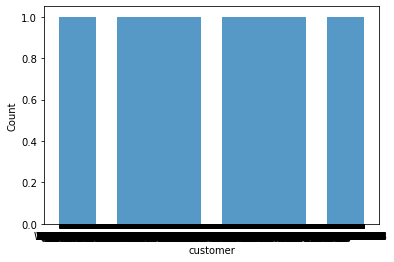

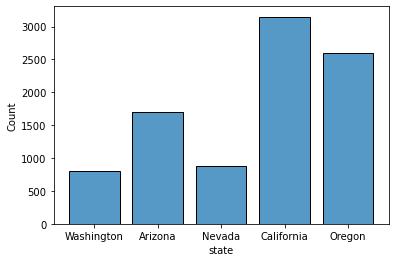

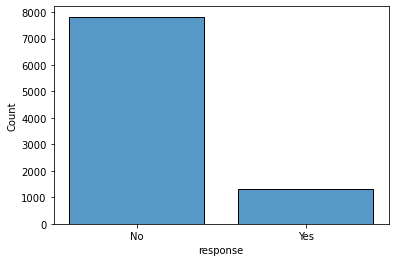

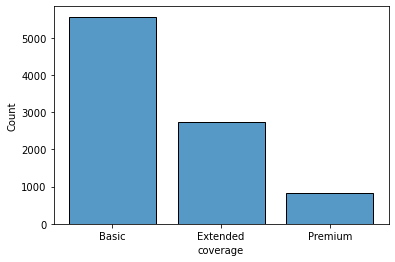

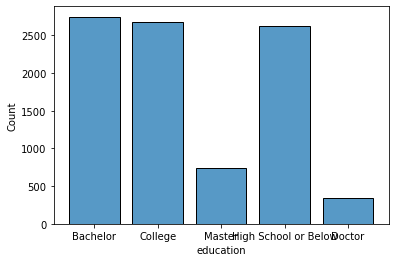

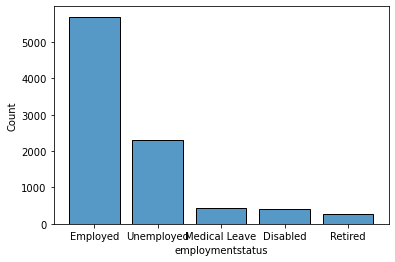

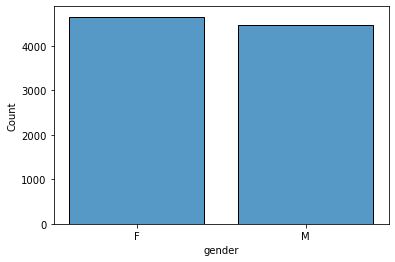

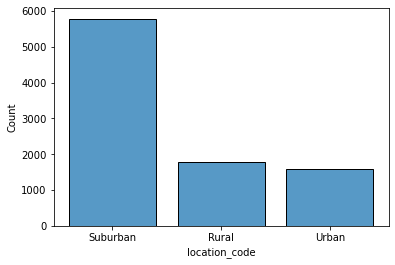

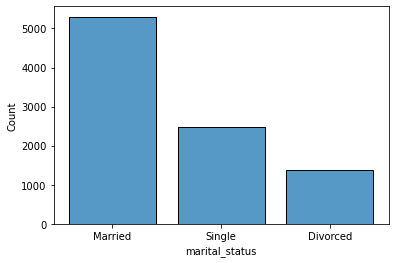

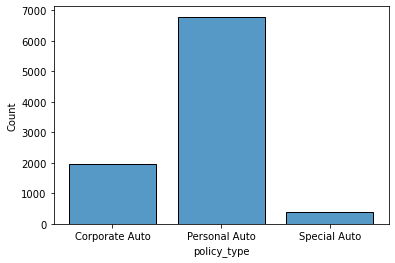

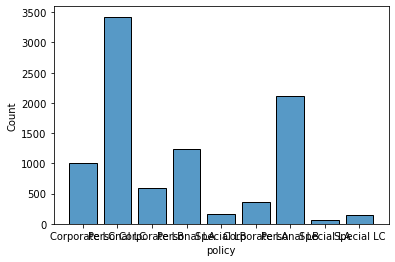

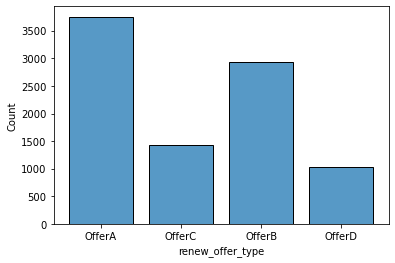

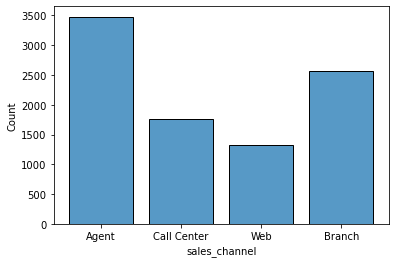

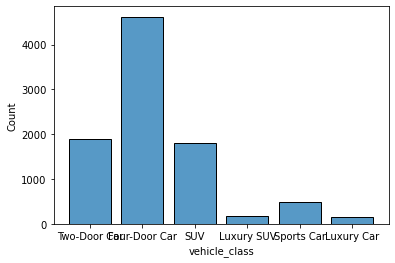

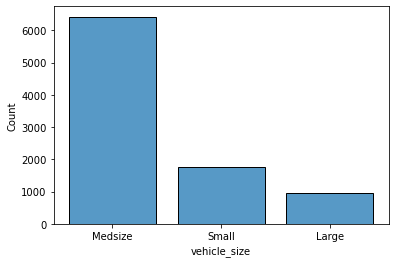

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in categorical_df:
    sns.histplot(data = categorical_df, x = i, shrink= .8)
    plt.show()

In [22]:
# 4.  Plot time variable. Can you extract something from it

<AxesSubplot:xlabel='Effective To Date', ylabel='Coverage'>

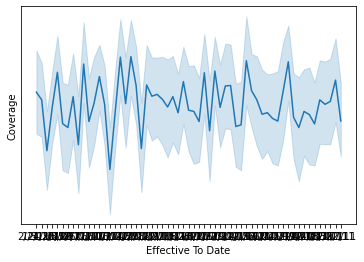

In [26]:
sns.lineplot(x = "Effective To Date", y = "Coverage", data = customer_df)


### No entiendo este último punto, un plot de solo tiempo no se como hacerlo

AttributeError: module 'matplotlib.pyplot' has no attribute 'date'